## Training Decision Tree Model

### Step 1 | Import libraries

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from tune_clf_hyperparameters import tune_clf_hyperparameters
from plot_confusion_matrix import plot_confusion_matrix
from sklearn.feature_selection import SelectFromModel
warnings.filterwarnings("ignore")

### Step 2 | Import preprocessed dataset

In [2]:
train_df = pd.read_csv('./data/preprocessed_train_df.csv')
test_df = pd.read_csv('./data/preprocessed_test_data.csv')

In [3]:
X_train = train_df.drop(columns=['NObeyesdad'])
y_train = train_df['NObeyesdad']
X_test = test_df.drop(columns=['NObeyesdad'])
y_test = test_df['NObeyesdad']

### Step 3 | Tuning hyperparameters of model

In [4]:
# Create a baseline model
base_dt = DecisionTreeClassifier(random_state=42)

In [5]:
# Define the space of hyperparameters
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': np.arange(1, 20, 2),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 10],
    'max_features': ['sqrt', None]
}

In [6]:
# Hyperparameter tuning with pre-defined function
best_dt, best_dt_hyperparams, tuning_results = tune_clf_hyperparameters(base_dt, param_grid_dt, X_train, y_train)

In [7]:
# Print top 10 hyperparameters selection that gives top 10 accuracy score
tuning_results.sort_values('rank_test_score').head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
766,0.204192,0.018575,0.002754,0.002083,entropy,11,None,10,10,best,"{'criterion': 'entropy', 'max_depth': 11, 'max...",0.875075,0.875941,0.868413,0.876844,0.885577,0.876370,0.005480,1
762,0.156976,0.008819,0.007651,0.003863,entropy,11,None,10,2,best,"{'criterion': 'entropy', 'max_depth': 11, 'max...",0.875075,0.875941,0.868413,0.876844,0.885577,0.876370,0.005480,1
764,0.191706,0.023171,0.009994,0.001464,entropy,11,None,10,5,best,"{'criterion': 'entropy', 'max_depth': 11, 'max...",0.875075,0.875941,0.868413,0.876844,0.885577,0.876370,0.005480,1
238,0.151711,0.014314,0.005769,0.003554,gini,9,None,10,10,best,"{'criterion': 'gini', 'max_depth': 9, 'max_fea...",0.872065,0.875339,0.871123,0.883469,0.878952,0.876190,0.004561,4
236,0.132817,0.013444,0.004233,0.003893,gini,9,None,10,5,best,"{'criterion': 'gini', 'max_depth': 9, 'max_fea...",0.872065,0.875339,0.871123,0.883469,0.878952,0.876190,0.004561,4
234,0.133331,0.007003,0.005714,0.004773,gini,9,None,10,2,best,"{'criterion': 'gini', 'max_depth': 9, 'max_fea...",0.872065,0.875339,0.871123,0.883469,0.878952,0.876190,0.004561,4
710,0.185582,0.013494,0.003176,0.003900,entropy,9,None,4,5,best,"{'criterion': 'entropy', 'max_depth': 9, 'max_...",0.872366,0.877447,0.867510,0.879855,0.883168,0.876069,0.005543,7
708,0.192757,0.023931,0.004665,0.004916,entropy,9,None,4,2,best,"{'criterion': 'entropy', 'max_depth': 9, 'max_...",0.872366,0.877447,0.867510,0.879855,0.883168,0.876069,0.005543,7
716,0.182661,0.025331,0.002007,0.004014,entropy,9,None,10,5,best,"{'criterion': 'entropy', 'max_depth': 9, 'max_...",0.870861,0.877447,0.869316,0.878651,0.882264,0.875708,0.004879,9
714,0.162180,0.013696,0.009706,0.003339,entropy,9,None,10,2,best,"{'criterion': 'entropy', 'max_depth': 9, 'max_...",0.870861,0.877447,0.869316,0.878651,0.882264,0.875708,0.004879,9


In [8]:
best_dt_hyperparams

{'criterion': 'entropy',
 'max_depth': 11,
 'max_features': None,
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'splitter': 'best'}

In [9]:
print(classification_report(y_train, best_dt.predict(X_train), digits=4))

              precision    recall  f1-score   support

           0     0.9188    0.9425    0.9305      2018
           1     0.8771    0.8771    0.8771      2465
           2     0.7919    0.7899    0.7909      1942
           3     0.8170    0.8186    0.8178      2018
           4     0.8991    0.8840    0.8915      2328
           5     0.9714    0.9669    0.9691      2598
           6     0.9975    0.9975    0.9975      3237

    accuracy                         0.9062     16606
   macro avg     0.8961    0.8967    0.8964     16606
weighted avg     0.9062    0.9062    0.9062     16606



In [10]:
y_predict = best_dt.predict(X_test)
print(classification_report(y_test, y_predict, digits=4))

              precision    recall  f1-score   support

           0     0.9049    0.9426    0.9234       505
           1     0.8325    0.8379    0.8352       617
           2     0.7532    0.7175    0.7350       485
           3     0.7682    0.7758    0.7720       504
           4     0.8542    0.8557    0.8549       582
           5     0.9642    0.9523    0.9582       650
           6     0.9963    0.9963    0.9963       809

    accuracy                         0.8803      4152
   macro avg     0.8677    0.8683    0.8678      4152
weighted avg     0.8798    0.8803    0.8800      4152



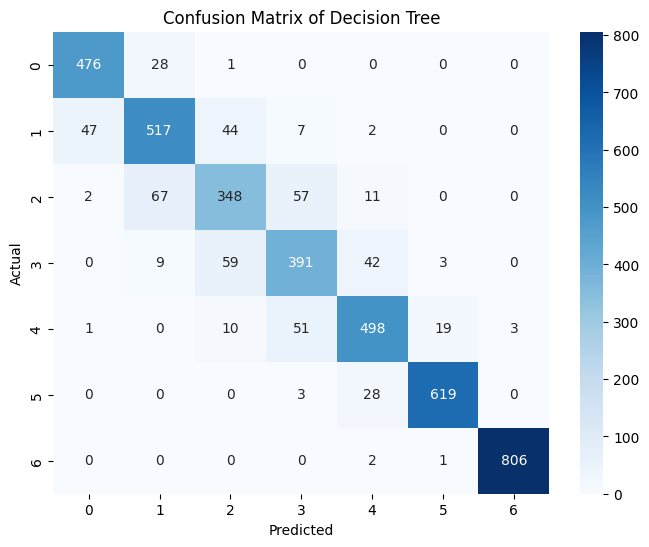

In [11]:
plot_confusion_matrix(y_test, y_predict, 'Confusion Matrix of Decision Tree')

### Step 4 | Feature Selection Using Decision Tree

#### Step 4.1 | Extracting selected feature from Decision Tree

In [12]:
best_dt_feature_selection = SelectFromModel(DecisionTreeClassifier(criterion = 'entropy',
 max_depth = 11,
 max_features = None,
 min_samples_leaf = 10,
 min_samples_split = 2,
 splitter = 'best'), threshold = 'median')

In [13]:
best_dt_feature_selection.fit(X_train, y_train)

SelectFromModel(estimator=DecisionTreeClassifier(criterion='entropy',
                                                 max_depth=11,
                                                 min_samples_leaf=10),
                threshold='median')

In [14]:
selected_features = X_train.columns[(best_dt_feature_selection.get_support())]
len(selected_features)

10

In [15]:
selected_features

Index(['Gender', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF',
       'TUE', 'CALC'],
      dtype='object')

#### Step 4.2 | Retrain Decision Tree with selected feature and hyperparameters

In [16]:
X_train_select = X_train[selected_features]
X_test_select = X_test[selected_features]


#fitting the model with the most importart features
best_dt_2 = DecisionTreeClassifier(criterion = 'entropy',
 max_depth = 11,
 max_features = None,
 min_samples_leaf = 10,
 min_samples_split = 2,
 splitter = 'best')
best_dt_2.fit(X_train_select, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_leaf=10)

In [17]:
print(classification_report(y_train, best_dt_2.predict(X_train_select), digits=4))

              precision    recall  f1-score   support

           0     0.9159    0.9390    0.9273      2018
           1     0.8712    0.8779    0.8745      2465
           2     0.7879    0.7863    0.7871      1942
           3     0.8059    0.8127    0.8093      2018
           4     0.9052    0.8776    0.8912      2328
           5     0.9714    0.9669    0.9691      2598
           6     0.9975    0.9975    0.9975      3237

    accuracy                         0.9039     16606
   macro avg     0.8936    0.8940    0.8937     16606
weighted avg     0.9040    0.9039    0.9039     16606



In [18]:
y_predict2 = best_dt_2.predict(X_test_select)
print(classification_report(y_test, y_predict2, digits=4))

              precision    recall  f1-score   support

           0     0.9066    0.9228    0.9146       505
           1     0.8170    0.8395    0.8281       617
           2     0.7419    0.7113    0.7263       485
           3     0.7558    0.7738    0.7647       504
           4     0.8687    0.8522    0.8604       582
           5     0.9627    0.9523    0.9575       650
           6     0.9963    0.9963    0.9963       809

    accuracy                         0.8767      4152
   macro avg     0.8641    0.8640    0.8640      4152
weighted avg     0.8767    0.8767    0.8766      4152



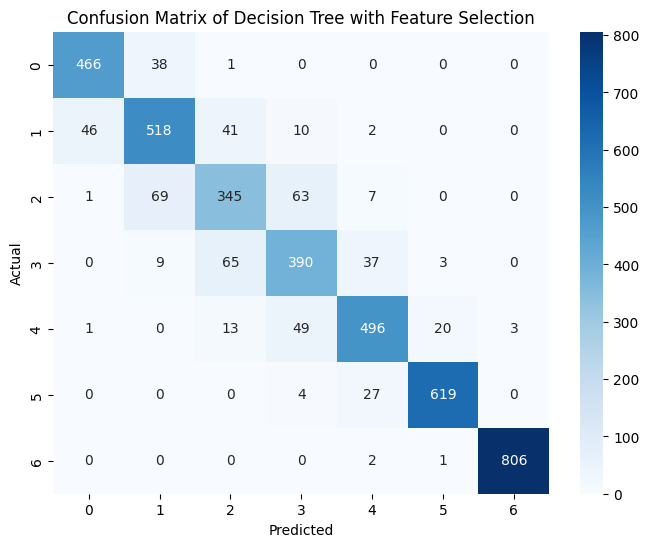

In [19]:
plot_confusion_matrix(y_test, y_predict2, 'Confusion Matrix of Decision Tree with Feature Selection')

### Step 5 | Retrain Decision Tree with feature selection by Random Forest with tuning hyperparameters

In [20]:
selected_features = ['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

In [21]:
X_train_select = X_train[selected_features]
X_test_select = X_test[selected_features]

In [22]:
retrain_dt = DecisionTreeClassifier(criterion = 'entropy',
 max_depth = 11,
 max_features = None,
 min_samples_leaf = 10,
 min_samples_split = 2,
 splitter = 'best')
retrain_dt.fit(X_train_select, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_leaf=10)

In [23]:
print(classification_report(y_train, retrain_dt.predict(X_train_select), digits=4))

              precision    recall  f1-score   support

           0     0.9184    0.9376    0.9279      2018
           1     0.8743    0.8722    0.8733      2465
           2     0.7850    0.7729    0.7789      1942
           3     0.7971    0.8176    0.8072      2018
           4     0.8996    0.8814    0.8904      2328
           5     0.9714    0.9673    0.9693      2598
           6     0.9975    0.9975    0.9975      3237

    accuracy                         0.9025     16606
   macro avg     0.8919    0.8924    0.8921     16606
weighted avg     0.9026    0.9025    0.9025     16606



In [24]:
y_predict = retrain_dt.predict(X_test_select)
print(classification_report(y_test, y_predict, digits=4))

              precision    recall  f1-score   support

           0     0.9091    0.9307    0.9198       505
           1     0.8206    0.8379    0.8292       617
           2     0.7483    0.6866    0.7161       485
           3     0.7427    0.7619    0.7522       504
           4     0.8525    0.8643    0.8584       582
           5     0.9612    0.9523    0.9567       650
           6     0.9963    0.9963    0.9963       809

    accuracy                         0.8748      4152
   macro avg     0.8615    0.8614    0.8612      4152
weighted avg     0.8742    0.8748    0.8743      4152



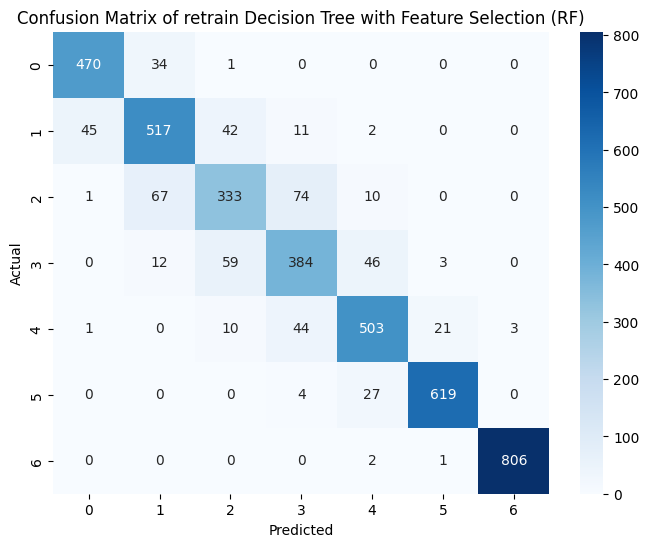

In [25]:
plot_confusion_matrix(y_test, y_predict, 'Confusion Matrix of retrain Decision Tree with Feature Selection (RF)')